In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
from arch.univariate import arch_model

# Collecting Data
spy = yf.Ticker("SPY")  # Init spy ticker
start = (datetime.today() - timedelta(days=730)).strftime('%Y-%m-%d')
data = yf.download("SPY", interval="1d", start=start)
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()

am = arch_model(returns, vol="Garch", p=2, o=0, q=2, dist="Normal")
res = am.fit(update_freq=5)
forecasts = res.forecast(horizon=5)

variance = forecasts.variance.dropna()
per_period_variance = variance.diff().fillna(variance.iloc[0])
per_period_volatility = np.sqrt(per_period_variance)

# Convert volatility to percentage
per_period_volatility_pct = per_period_volatility * 100

print("Per-period volatility forecast (%):")
print(per_period_volatility_pct)

[*********************100%%**********************]  1 of 1 completed

Iteration:      5,   Func. Count:     44,   Neg. LLF: 732.8972262753845
Iteration:     10,   Func. Count:     84,   Neg. LLF: 724.5039901757303
Iteration:     15,   Func. Count:    123,   Neg. LLF: 723.9486279194286
Iteration:     20,   Func. Count:    159,   Neg. LLF: 723.9343982340047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 723.9343844795737
            Iterations: 22
            Function evaluations: 173
            Gradient evaluations: 22
Per-period volatility forecast (%):
                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2024-04-03  64.428753  63.894156  64.422735  63.927135  64.417964



/home/neohost/main-stuff/alpha-research-capital/venv/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


Annualized Volatility:
Date
2022-05-18    26.588017
2022-05-19    34.684462
2022-05-20    35.563806
2022-05-23    34.045202
2022-05-24    34.035774
                ...    
2024-03-27     7.707380
2024-03-28     8.126063
2024-04-01     7.997393
2024-04-02     7.083476
2024-04-03     7.863397
Length: 471, dtype: float64


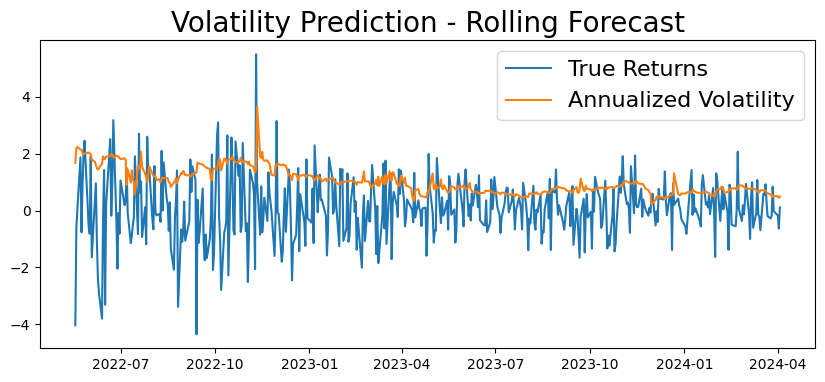

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
from arch.univariate import arch_model
import matplotlib.pyplot as plt
from arch.__future__ import reindexing

# Collecting Data
spy = yf.Ticker("SPY")  # Init spy ticker
start = (datetime.today() - timedelta(days=730)).strftime('%Y-%m-%d')
data = yf.download("SPY", interval="1d", start=start)
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()

# Rolling window parameters
window_size = 30
horizon = 1

# Perform rolling forecast
rolling_predictions = []
for i in range(len(returns) - window_size):
    train_data = returns[i:i+window_size]
    am = arch_model(train_data, vol="Garch", p=2, o=0, q=2, dist="Normal")
    res = am.fit(disp='off')
    forecast = res.forecast(horizon=horizon)
    rolling_predictions.append(forecast.variance.iloc[-1, 0])

rolling_predictions = pd.Series(
    rolling_predictions, index=returns.index[window_size:])
per_period_volatility = np.sqrt(rolling_predictions)

# Annualize volatility
annualized_volatility = per_period_volatility * np.sqrt(252)

print("Annualized Volatility:")
print(annualized_volatility)

# Create the plot
plt.figure(figsize=(10, 4))
true_returns_range = returns[window_size:]
true, = plt.plot(true_returns_range)
preds, = plt.plot(per_period_volatility)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Annualized Volatility'], fontsize=16)
plt.show()

In [114]:
import datetime as dt
import sys

import arch.data.sp500
import numpy as np
import pandas as pd
from arch import arch_model

data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

forecasts = res.forecast(horizon=5)

print(forecasts.variance)
print(np.sqrt(forecasts.variance))

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                h.1       h.2       h.3       h.4       h.5
Date                                                       
2018-12-31  3.59647  3.568502  3.540887  3.513621  3.486701
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2018-12-31  1.896436  1.889048  1.881724  1.874466  1.867271


In [59]:
import plotly.express as px

plot_data = volatility.T
print(plot_data)
plot_data_melted = pd.melt(plot_data.reset_index(), id_vars=[
                           'index'], var_name='horizon', value_name='volatility')
print(plot_data_melted)

fig = px.line(plot_data_melted, x='index', y='volatility',
              color='horizon', title="Forecasted Volatility")
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Volatility')
fig.show()

Datetime  2024-04-02 15:30:00
h.1                  0.194191
h.2                  0.233204
h.3                  0.260590
h.4                  0.280847
h.5                  0.296261
  index             horizon  volatility
0   h.1 2024-04-02 15:30:00    0.194191
1   h.2 2024-04-02 15:30:00    0.233204
2   h.3 2024-04-02 15:30:00    0.260590
3   h.4 2024-04-02 15:30:00    0.280847
4   h.5 2024-04-02 15:30:00    0.296261


In [84]:
# Implied Options Prices

spy_options = spy.option_chain((datetime.today() + timedelta(days=2)).strftime('%Y-%m-%d'))
spy_options_calls = spy_options.calls

# Prices close to underlying

# Extract the expiration date from the 'contractSymbol' column
spy_options_calls['expiration'] = spy_options_calls['contractSymbol'].str.extract(
    r'(\d{6})')

# Convert the expiration date to 'YYYY-MM-DD' format
spy_options_calls['expiration'] = pd.to_datetime(
    spy_options_calls['expiration'], format='%y%m%d')


close_to_underlying = spy_options_calls.iloc[len(spy_options)//4:len(spy_options)//4*3]
print(spy_options_calls['expiration'].iloc[0])
print(spy_options_calls.iloc[28]['lastPrice'])
print(spy_options_calls.iloc[65:75])

2024-04-05 00:00:00
47.77
        contractSymbol             lastTradeDate  strike  lastPrice  bid  ask  \
65  SPY240405C00510000 2024-04-02 20:05:21+00:00   510.0       9.75  0.0  0.0   
66  SPY240405C00511000 2024-04-02 19:47:01+00:00   511.0       8.67  0.0  0.0   
67  SPY240405C00512000 2024-04-02 20:05:42+00:00   512.0       7.95  0.0  0.0   
68  SPY240405C00513000 2024-04-02 20:11:08+00:00   513.0       7.12  0.0  0.0   
69  SPY240405C00514000 2024-04-02 20:12:44+00:00   514.0       6.31  0.0  0.0   
70  SPY240405C00515000 2024-04-02 20:14:01+00:00   515.0       5.55  0.0  0.0   
71  SPY240405C00516000 2024-04-02 20:14:10+00:00   516.0       4.77  0.0  0.0   
72  SPY240405C00517000 2024-04-02 20:14:53+00:00   517.0       4.03  0.0  0.0   
73  SPY240405C00518000 2024-04-02 20:14:46+00:00   518.0       3.40  0.0  0.0   
74  SPY240405C00519000 2024-04-02 20:14:56+00:00   519.0       2.82  0.0  0.0   

    change  percentChange  volume  openInterest  impliedVolatility  \
65     0.0  

In [81]:
# Theoretical options pricing and greeks via Black Scholes
from scipy.stats import norm
import math


def d1(underlying, strike, interest, vol, time):
    d1 = (np.log(underlying/strike) + (interest +
          (math.pow(vol, 2)/2))*time)/(vol*np.sqrt(time))
    return d1


def d2(d1, vol, time):
    d2 = d1 - vol*np.sqrt(time)
    return d2


def call(underlying, d1, d2, strike, interest, time):
    call_price = underlying * \
        norm.cdf(d1) - strike * np.exp(-interest*time) * norm.cdf(d2)
    return call_price


def put(underlying, call, strike, interest, time):
    put_price = call - underlying + strike*np.exp(-interest*time)
    return put_price


def delta_call(d1):
    delta = norm.cdf(d1)
    return delta


def delta_put(d1):
    delta = norm.cdf(d1) - 1
    return delta


def gamma(underlying, d1, vol, time):
    gamma = norm.pdf(d1) / (underlying * vol * np.sqrt(time))
    return gamma


def vega(underlying, d1, time):
    vega = underlying * norm.pdf(d1) * np.sqrt(time)
    return vega / 100


def theta_call(underlying, d1, d2, strike, interest, vol, time):
    theta = -((underlying * norm.pdf(d1) * vol) / (2 * np.sqrt(time))) - \
        (interest * strike * np.exp(-interest * time) * norm.cdf(d2))
    return theta / 365


def theta_put(underlying, d1, d2, strike, interest, vol, time):
    theta = -((underlying * norm.pdf(d1) * vol) / (2 * np.sqrt(time))) + \
        (interest * strike * np.exp(-interest * time) * norm.cdf(-d2))
    return theta / 365


def rho_call(strike, d2, interest, time):
    rho = strike * time * np.exp(-interest * time) * norm.cdf(d2)
    return rho / 100


def rho_put(strike, d2, interest, time):
    rho = -strike * time * np.exp(-interest * time) * norm.cdf(-d2)
    return rho / 100


# Variables
# Underlying
recent_price = yf.download("SPY", period="1d")
underlying = recent_price['Adj Close'].iloc[0]
print(f'Underlying: {underlying}')

# Interest
interest_price = yf.download("^TNX", period="1d")
interest_price = interest_price['Adj Close'].iloc[0] * .01

# Vol
vol = volatility.iloc[0][0]
print(f'Volatility: {vol}')

# Time
expiration_date = spy_options_calls['expiration'].iloc[0]
time_to_expr = (expiration_date - pd.to_datetime(datetime.today().date())).days
time = time_to_expr/252

# Retrieve actual options prices using yfinance
spy_options = yf.Ticker("SPY").option_chain(
    expiration_date.strftime('%Y-%m-%d'))
actual_calls = spy_options.calls
actual_puts = spy_options.puts

# Find the closest strike prices to the underlying price
closest_strike_call = actual_calls.iloc[(
    actual_calls['strike'] - underlying).abs().argsort()[:1]]['strike'].values[0]
closest_strike_put = actual_puts.iloc[(
    actual_puts['strike'] - underlying).abs().argsort()[:1]]['strike'].values[0]

# Calculating theoretical pricing and greeks
d1_call = d1(underlying, closest_strike_call, interest_price, vol, time)
d2_call = d2(d1_call, vol, time)
theoretical_call = call(underlying, d1_call, d2_call,
                        closest_strike_call, interest_price, time)
delta_call_value = delta_call(d1_call)
gamma_call_value = gamma(underlying, d1_call, vol, time)
vega_call_value = vega(underlying, d1_call, time)
theta_call_value = theta_call(
    underlying, d1_call, d2_call, closest_strike_call, interest_price, vol, time)
rho_call_value = rho_call(closest_strike_call, d2_call, interest_price, time)

d1_put = d1(underlying, closest_strike_put, interest_price, vol, time)
d2_put = d2(d1_put, vol, time)
theoretical_put = put(underlying, theoretical_call,
                      closest_strike_put, interest_price, time)
delta_put_value = delta_put(d1_put)
gamma_put_value = gamma(underlying, d1_put, vol, time)
vega_put_value = vega(underlying, d1_put, time)
theta_put_value = theta_put(
    underlying, d1_put, d2_put, closest_strike_put, interest_price, vol, time)
rho_put_value = rho_put(closest_strike_put, d2_put, interest_price, time)

# Retrieve actual options prices for the closest strike prices
actual_call_price = actual_calls[actual_calls['strike']
                                 == closest_strike_call]['lastPrice'].values[0]
actual_put_price = actual_puts[actual_puts['strike']
                               == closest_strike_put]['lastPrice'].values[0]

print(
    f"Theoretical Call Price (Strike: {closest_strike_call}): {theoretical_call:.2f}")
print(
    f"Actual Call Price (Strike: {closest_strike_call}): {actual_call_price:.2f}")
print(f"Delta (Call): {delta_call_value:.2f}")
print(f"Gamma (Call): {gamma_call_value:.2f}")
print(f"Vega (Call): {vega_call_value:.2f}")
print(f"Theta (Call): {theta_call_value:.2f}")
print(f"Rho (Call): {rho_call_value:.2f}")

print(
    f"Theoretical Put Price (Strike: {closest_strike_put}): {theoretical_put:.2f}")
print(
    f"Actual Put Price (Strike: {closest_strike_put}): {actual_put_price:.2f}")
print(f"Delta (Put): {delta_put_value:.2f}")
print(f"Gamma (Put): {gamma_put_value:.2f}")
print(f"Vega (Put): {vega_put_value:.2f}")
print(f"Theta (Put): {theta_put_value:.2f}")
print(f"Rho (Put): {rho_put_value:.2f}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Underlying: 518.8400268554688
Volatility: 0.1941909754874699
Theoretical Call Price (Strike: 519.0): 3.59
Actual Call Price (Strike: 519.0): 2.82
Delta (Call): 0.50
Gamma (Call): 0.04
Vega (Call): 0.18
Theta (Call): -0.65
Rho (Call): 0.02
Theoretical Put Price (Strike: 519.0): 3.57
Actual Put Price (Strike: 519.0): 2.37
Delta (Put): -0.50
Gamma (Put): 0.04
Vega (Put): 0.18
Theta (Put): -0.59
Rho (Put): -0.02
